In [1]:
import pandas as pd
import numpy as np
import networkx as nx

from pylab import rcParams

In [2]:
G = nx.Graph()

In [3]:
df = pd.read_csv('../../data/disney/imagineering_jobs.csv')
df['keywords'] = df['keywords'].fillna('').map(lambda x: x.split(', '))

df = df[df.close == '-']

df.head(n=3)

,cat_id,job_id,title,date,brand,location,req_id,url,close,full_title,keywords
0,391,30172889184,Software Development Mgr,2022-05-31,Walt Disney Imagineering,"Orlando, Florida, United States / Lake Buena V...",941484BR,https://jobs.disneycareers.com/job/orlando/sof...,-,Software Development Manager,[]
1,391,30224999136,Show Systems Engineering Senior,2022-06-01,Walt Disney Imagineering,"Glendale, California, United States / Glendale...",945616BR,https://jobs.disneycareers.com/job/glendale/sh...,-,Show Systems Engineering Senior,[SENIOR]
2,391,30518402336,PH-Asst Project Mgr,2022-06-06,Walt Disney Imagineering,"Orlando, Florida, United States / Lake Buena V...",993386BR,https://jobs.disneycareers.com/job/orlando/ph-...,-,Assistant Project Manager (Project Hire),[PROJECT-HIRE]


In [4]:
for id, start_date in df[['req_id', 'date']].values:
    G.add_node(f'RQ - {id}', start_date = start_date)

In [5]:
keywords = set()
for terms in df[df.keywords.map(len) > 1].keywords:
  for term in terms:
      keywords.add(term)

for keyword in list(keywords):
    G.add_node(f'KW - {keyword}')

In [6]:
for id, terms in df[df.keywords.map(len) > 1][['req_id', 'keywords']].values:
    for keyword in terms:
        G.add_edge(f'RQ - {id}', f'KW - {keyword}')

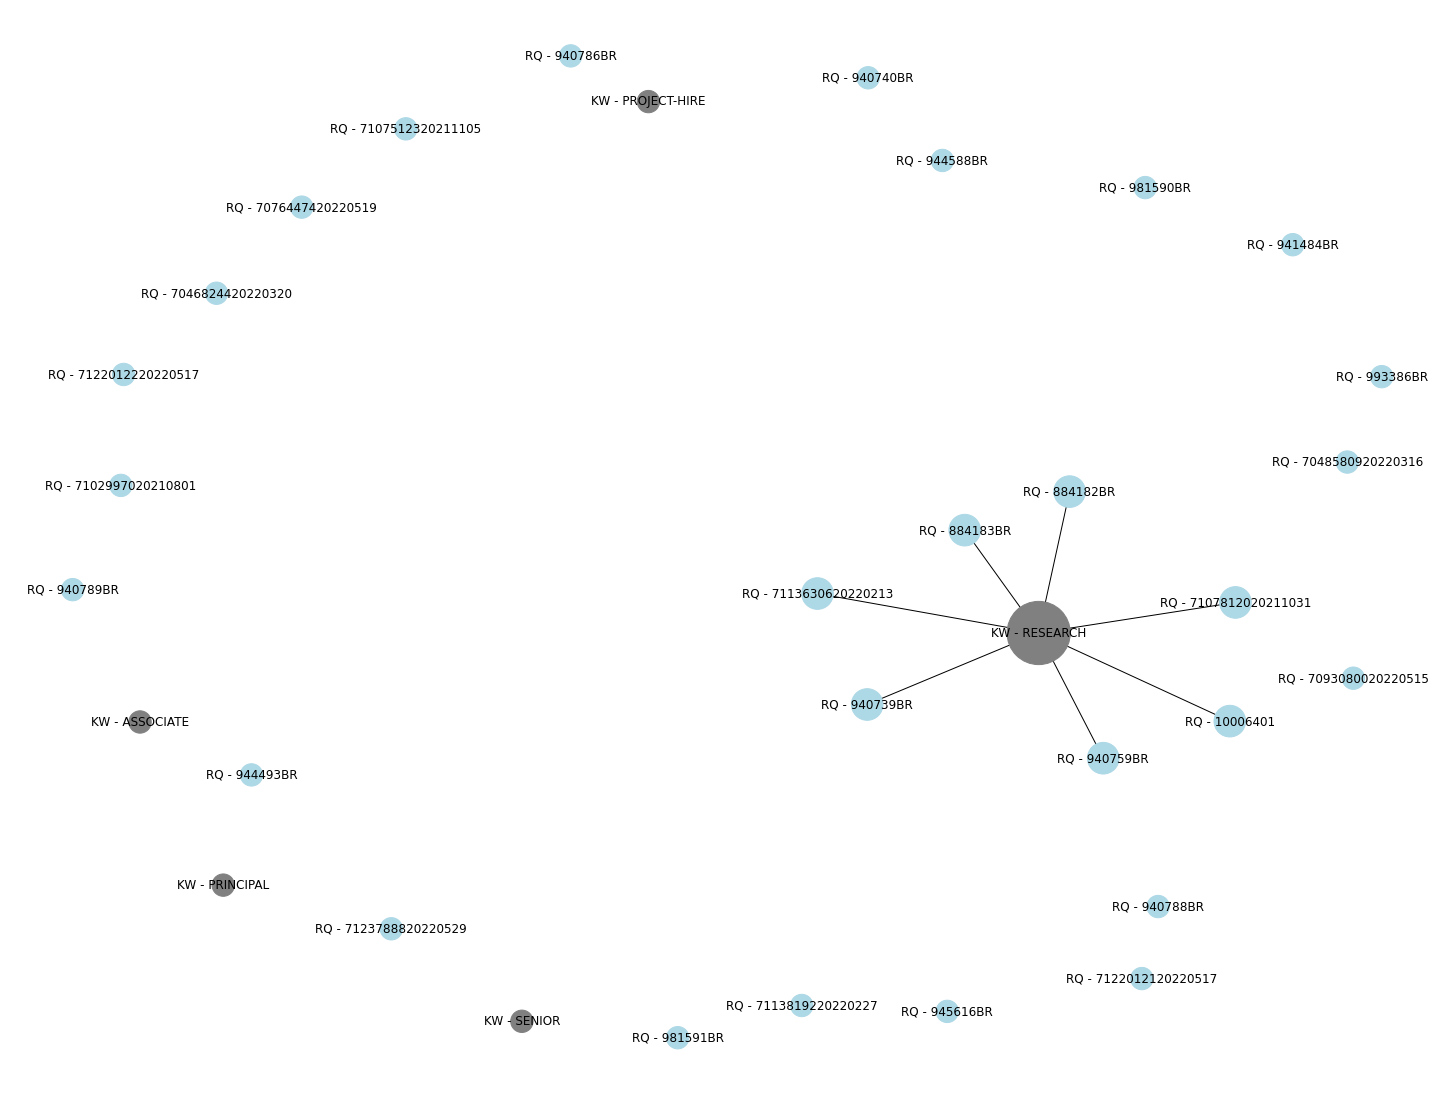

In [7]:
import numpy as np

from pylab import rcParams
rcParams['figure.figsize'] = 20, 15

pos = nx.spring_layout(G, scale=20, k=3/np.sqrt(G.order()))

colors = [ 'lightblue' if node.startswith('RQ') else 'gray' for node in G.nodes() ]

d = dict(G.degree)

nx.draw(
    G,
    pos,
    with_labels=True,
    nodelist=d,
    node_size=[(d[k]+1)*500 for k in d],
    node_color=colors,
)